Crop image

In [13]:
import cv2
import functools
import matplotlib.pyplot as plt

In [14]:
def Preprocessing (image) : 
    image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    height, width = image.shape 
    img = cv2.GaussianBlur(image, (9, 9), 0) #decrease noise for dialation
    #For better accuracy, use binary images. So before finding contours, apply threshold
    #the algorithm determines the threshold for a pixel based on a small region around it
    #cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
    #cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 101, 30)
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 101, 30)
    #A structuring element is a matrix that identifies the pixel in the image being processed and defines the neighborhood used in the processing of each pixel
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 20))
    #To make the text bigger and bigger we use dilation to increase text region and make it close to rectangles
    img = cv2.dilate(img, kernel, iterations=8)
    #In OpenCV, finding contours is like finding white object from black background
    #Second argument is contour retrieval mode
    #RETR_EXTERNAL: retrieves only the extreme outer contours
    # Third argument is contour approximation method
    #CHAIN_APPROX_SIMPLE:compresses horizontal, vertical, and diagonal segments and leaves only their end points
    #For example, an up-right rectangular contour is encoded with 4 points.
    contours = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0] 
    #Now we have a number of contours so we want to get the bigger one
    biggest_contour = functools.reduce(lambda c1, c2: c1 if cv2.contourArea(c1) > cv2.contourArea(c2) else c2,contours) 
    # Find smallest rect that can contain the text area after dialation
    x, y, w, h = cv2.boundingRect(biggest_contour)
    #Now crop the image 
    image = image[y:y + h, x:x + w]
    return image


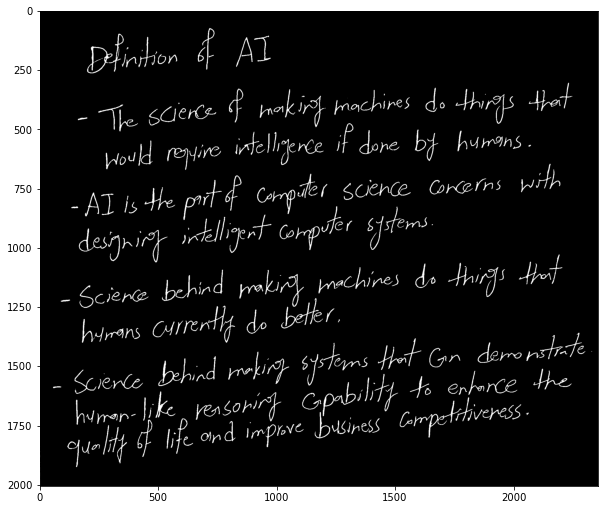

In [19]:
image = cv2.imread("..\\Data_split\\train\\Males\\M20.jpg")
img = Preprocessing(image)
fig = plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
plt.show()